# Brynjar

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import seaborn as sns
import numpy as np
plt.style.use('seaborn-v0_8-bright')
import calplot
import folium
from sklearn.linear_model import LinearRegression

In [191]:
# Coordinates for NFL teams
stadium_coordinates = pd.read_csv("DatasetNew/NFL_stadium_coordinates.csv")

# Attendance at each game from 2000 to 2019
game_attendance = pd.read_csv("DatasetNew/NFL_Attendance_2000_2019.csv")

# Information about each game from 1999 to 2023
games = pd.read_csv("DatasetNew/games.csv")

In [192]:
# Dictionary to map team names to abbreviations
team_abbr = {
    'Cardinals': 'ARI',
    'Falcons': 'ATL',
    'Ravens': 'BAL',
    'Bills': 'BUF',
    'Panthers': 'CAR',
    'Bears': 'CHI',
    'Bengals': 'CIN',
    'Browns': 'CLE',
    'Cowboys': 'DAL',
    'Broncos': 'DEN',
    'Lions': 'DET',
    'Packers': 'GB',
    'Texans': 'HOU',
    'Colts': 'IND',
    'Jaguars': 'JAX',
    'Chiefs': 'KC',
    'Raiders': 'OAK',
    'Chargers': 'LAC',
    'Rams': 'LA',
    'Dolphins': 'MIA',
    'Vikings': 'MIN',
    'Patriots': 'NE',
    'Saints': 'NO',
    'Giants': 'NYG',
    'Jets': 'NYJ',
    'Eagles': 'PHI',
    'Steelers': 'PIT',
    '49ers': 'SF',
    'Seahawks': 'SEA',
    'Buccaneers': 'TB',
    'Titans': 'TEN',
    'Redskins': 'WAS'
}

# Extract the last name from team names
game_attendance['last_name'] = game_attendance['team_name'].apply(lambda x: x.split()[-1])

# Map team names to abbreviations
team_abbr_map = {team: team_abbr[team] for team in game_attendance['last_name'].unique()}

# Create a new column with abbreviations
game_attendance['team_abbr'] = game_attendance['last_name'].map(team_abbr_map)



In [193]:
stadium_coordinates["Team"] = stadium_coordinates["Team"].replace('Forty-Niners', '49ers')

stadium_coordinates['team_abbr'] = stadium_coordinates['Team'].map(team_abbr)

In [194]:
games["gameday"] = pd.to_datetime(games['gameday'])
games['year'] = games['gameday'].dt.year


# Filter games for the years 2000 to 2019
game_score_filtered = games[(games['year'] >= 2000) & (games['year'] <= 2019)]

# Filter game_attendance for the years 2000 to 2019
team_data_filtered = game_attendance[(game_attendance['year'] >= 2000) & (game_attendance['year'] <= 2019)]

# Convert 'week' column to int type for consistency
game_score_filtered['week'] = game_score_filtered['week'].astype(int)

# Merge the filtered datasets on team abbreviation, week, and year
merged_data = pd.merge(game_score_filtered, team_data_filtered, left_on=['home_team', 'week', 'year'], right_on=['team_abbr', 'week', 'year'], how='inner')

# Merge the stadium coordinates
final_data = pd.merge(merged_data, stadium_coordinates, left_on=['team_abbr'], right_on=["team_abbr"], how='inner')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25612\1031509266.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [195]:
result = final_data[["game_id","season","week","gameday","weekday","home_team","away_team","home_score","away_score","stadium", "team","team_name","weekly_attendance","last_name","team_abbr","Team","longitude","latitude", "away_qb_name", "home_qb_name", "away_coach", "home_coach"]]

In [196]:
result.nunique()

game_id              4855
season                 21
week                   17
gameday               853
weekday                 7
home_team              32
away_team              34
home_score             59
away_score             54
stadium                84
team                   30
team_name              32
weekly_attendance    3803
last_name              32
team_abbr              32
Team                   32
longitude              31
latitude               31
away_qb_name          251
home_qb_name          240
away_coach            138
home_coach            133
dtype: int64

In [197]:
# Create a new column to indicate the winning team
result['winning_team'] = result.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else row['away_team'], axis=1)

# Create a new column 'home_team_win'
result['home_team_win'] = result['home_team'] == result['winning_team']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25612\3983529507.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25612\3983529507.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [198]:
# Convert 'season' column to datetime format
result['season'] = pd.to_datetime(result['season'], format='%Y')
# Extract the year component
result['season'] = result['season'].dt.year

# Filter out rows where 'season' column equals 1999
result = result[result['season'] != 1999]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25612\3092826610.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25612\3092826610.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [199]:
# SD and LAC THE SAME team
team_mapping = {
    'SD': 'LAC',
    # Add other mappings as necessary
}

In [200]:
# STL Land LA THE SAME team
team_mapping2 = {
    'STL': 'LA',
    # Add other mappings as necessary
}

In [201]:
result['home_team'] = result['home_team'].replace(team_mapping)
result['away_team'] = result['away_team'].replace(team_mapping)


In [202]:
result['home_team'] = result['home_team'].replace(team_mapping2)
result['away_team'] = result['away_team'].replace(team_mapping2)


In [203]:
result['team_abbr'] = result['team_abbr'].replace(team_mapping)
result['team_abbr'] = result['team_abbr'].replace(team_mapping2)

In [204]:
result.isna().sum()

game_id              0
season               0
week                 0
gameday              0
weekday              0
home_team            0
away_team            0
home_score           0
away_score           0
stadium              0
team                 0
team_name            0
weekly_attendance    0
last_name            0
team_abbr            0
Team                 0
longitude            0
latitude             0
away_qb_name         0
home_qb_name         0
away_coach           0
home_coach           0
winning_team         0
home_team_win        0
dtype: int64

In [205]:
result.to_csv('result_brynjar.csv', index=None)

In [206]:
result.nunique()

game_id              4840
season                 20
week                   17
gameday               851
weekday                 7
home_team              32
away_team              32
home_score             59
away_score             54
stadium                83
team                   30
team_name              32
weekly_attendance    3802
last_name              32
team_abbr              32
Team                   32
longitude              31
latitude               31
away_qb_name          250
home_qb_name          239
away_coach            136
home_coach            132
winning_team           34
home_team_win           2
dtype: int64

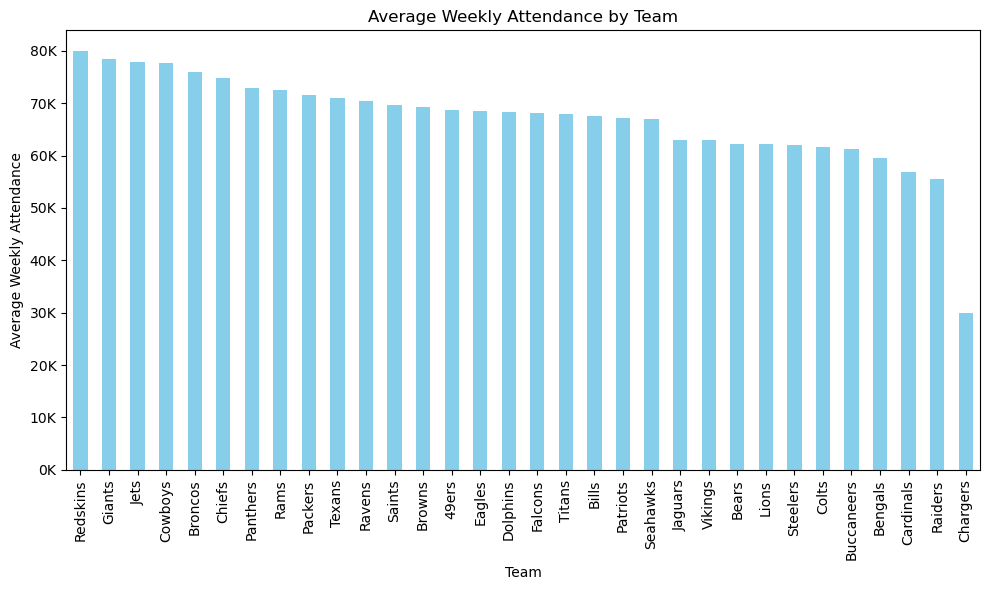

In [207]:
average_attendance = result.groupby('team_name')['weekly_attendance'].mean().sort_values(ascending=False)

# Generate the plot
plt.figure(figsize=(10, 6))
average_attendance.plot(kind='bar', color='skyblue')

# Set plot title and labels
plt.title('Average Weekly Attendance by Team')
plt.xlabel('Team')
plt.ylabel('Average Weekly Attendance')

# Calculate the maximum attendance (sum of weekly attendance for each team)
max_attendance = average_attendance.max()
max_tick = ((max_attendance + 10000) // 10000) * 10000

# Generate tick values at 10k intervals up to the maximum attendance
tick_values = range(0, int(max_tick) + 10000, 10000)
plt.yticks(tick_values, [f'{x/1000:.0f}K' for x in tick_values])

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.tight_layout()
plt.show()

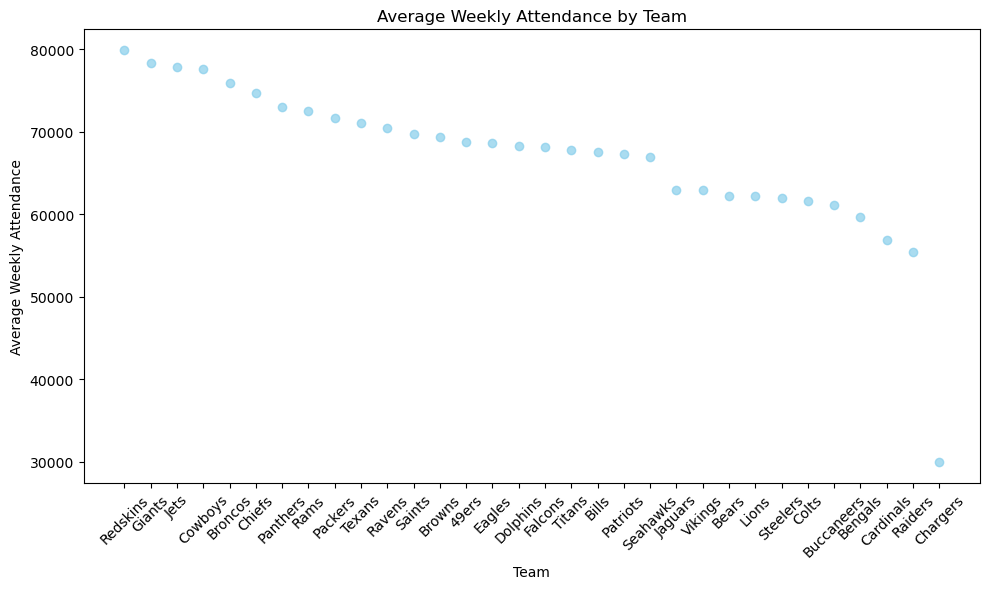

In [208]:
# Generate x and y values for the scatter plot
teams = average_attendance.index
average_attendances = average_attendance.values

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(teams, average_attendances, color='skyblue', alpha=0.7)

# Set plot title and labels
plt.title('Average Weekly Attendance by Team')
plt.xlabel('Team')
plt.ylabel('Average Weekly Attendance')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [209]:
#Calculate the number of wins for each team
home_wins = result[result['home_score'] > result['away_score']]['home_team'].value_counts()
away_wins = result[result['away_score'] > result['home_score']]['away_team'].value_counts()

# Combine home and away wins for each team
total_wins = home_wins.add(away_wins, fill_value=0).sort_values(ascending=False)

print(total_wins)
print(sum(total_wins))

NE     233
PIT    200
IND    195
GB     192
PHI    188
BAL    186
NO     177
DEN    173
SEA    172
DAL    165
MIN    162
ATL    161
TEN    159
KC     158
NYG    155
CAR    153
CHI    153
NYJ    145
MIA    144
CIN    141
SF     140
TB     136
BUF    136
WAS    129
HOU    129
ARI    127
JAX    127
OAK    118
DET    114
CLE     98
LAC     83
LA      81
Name: count, dtype: int64
4830


In [ ]:
qb_wins = result[result['winning_team'] == result['home_team']]['home_qb_name'].value_counts()

In [ ]:
qb_wins

In [ ]:
qb_losses = result[result['winning_team'] != result['home_team']]['home_qb_name'].value_counts()

In [ ]:
qb_losses

In [ ]:
qb_winning_percentage = (qb_wins / (qb_wins + qb_losses)) * 100
qb_winning_percentage.dtypes

In [ ]:
import pandas as pd

# Read the dataset


# 1. Data Preprocessing
# Check for missing values
print(result.isnull().sum())

# 2. Calculate Winning Percentage for QBs
qb_wins = result[result['winning_team'] == result['home_team']]['home_qb_name'].value_counts()
qb_losses = result[result['winning_team'] != result['home_team']]['home_qb_name'].value_counts()
qb_winning_percentage = (qb_wins / (qb_wins + qb_losses)) * 100

# Calculate Winning Percentage for Coaches
coach_wins = result[result['winning_team'] == result['home_team']]['home_coach'].value_counts()
coach_losses = result[result['winning_team'] != result['home_team']]['home_coach'].value_counts()
coach_winning_percentage = (coach_wins / (coach_wins + coach_losses)) * 100

# 3. Analyze Correlation
# For simplicity, let's just focus on the correlation between winning percentage and home team performance
# You can extend this analysis to include other factors if needed
home_team_performance = result[result['home_team_win'] == True]['home_team'].value_counts()

# Create a DataFrame with winning percentage, home team performance, and potentially other relevant factors
analysis_df = pd.DataFrame({
    'QB_Winning_Percentage': qb_winning_percentage,
    'Coach_Winning_Percentage': coach_winning_percentage,
    'Home_Team_Performance': home_team_performance
})

# Calculate correlation coefficients
correlation_matrix = analysis_df.corr()

# Print correlation matrix
print(correlation_matrix)

# 4. Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
